<a href="https://colab.research.google.com/github/hongsunjang/YBIGTA-pre-session/blob/main/0118_FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
titanic = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##  Null 값 비중 확인

In [30]:
titanic.isna().sum()/len(titanic)*100
# Null 값 비중을 확인하니 cabin value의 null값 비율이 특히 높다는것을 알 수 있다.

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [31]:
titanic.drop(columns=["Cabin"], inplace=True)

In [32]:
# Null 값 비중이 10% 이상인 Age값같은 경우 따로 파싱이 필요하다.
titanic["Age"].dtype

dtype('float64')

In [33]:
# 확인하니 Age값이 Numerical한 값이므로 배운대로 Median을 넣는다.
for c in ["Age"]:
  titanic[c] = titanic[c].fillna(titanic[c].median())

## Encoding이 필요한 값(Numercial 값이 아닌경우)

In [34]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [35]:
columns = ["Name", "Sex",  "Ticket", "Embarked"] # 이런 column들이 object값이다.

# unique 값들을 확인해보니 특히 Sex와 embarked 값은 인코딩이 필요한 것을 알 수 있다.
for c in columns:
  print(c, titanic[c].nunique())

Name 891
Sex 2
Ticket 681
Embarked 3


In [36]:
# label 인코더를 활용한다.
from sklearn.preprocessing import LabelEncoder
titanic['Sex'] = LabelEncoder().fit_transform(titanic['Sex'])
titanic['Embarked'] = LabelEncoder().fit_transform(titanic['Embarked'])
titanic[['Sex','Embarked']]


,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2
...,...,...
886,1,2
887,0,2
888,0,2
889,1,0


In [37]:
# Ticket과 Name의 경우 groupby를 통해 크게 카테고리정보가 아님을 알 수 있고, string split을 해야한다.
titanic.groupby(['Ticket'])['Ticket'].count().sort_values(ascending=False)/len(titanic) * 100


Ticket
CA. 2343    0.785634
1601        0.785634
347082      0.785634
347088      0.673401
CA 2144     0.673401
              ...   
PC 17601    0.112233
349239      0.112233
349240      0.112233
349241      0.112233
347464      0.112233
Name: Ticket, Length: 681, dtype: float64

In [38]:
titanic.groupby(['Name'])['Name'].count().sort_values(ascending=False)/len(titanic) * 100

Name
van Melkebeke, Mr. Philemon                0.112233
Goldschmidt, Mr. George B                  0.112233
Graham, Miss. Margaret Edith               0.112233
Goodwin, Mrs. Frederick (Augusta Tyler)    0.112233
Goodwin, Mr. Charles Edward                0.112233
                                             ...   
Nilsson, Miss. Helmina Josefina            0.112233
Nicola-Yarred, Miss. Jamila                0.112233
Nicola-Yarred, Master. Elias               0.112233
Nicholson, Mr. Arthur Ernest               0.112233
Abbing, Mr. Anthony                        0.112233
Name: Name, Length: 891, dtype: float64

In [39]:
titanic.drop(columns=["Name", 'Ticket'], inplace=True)

## Outlier removing

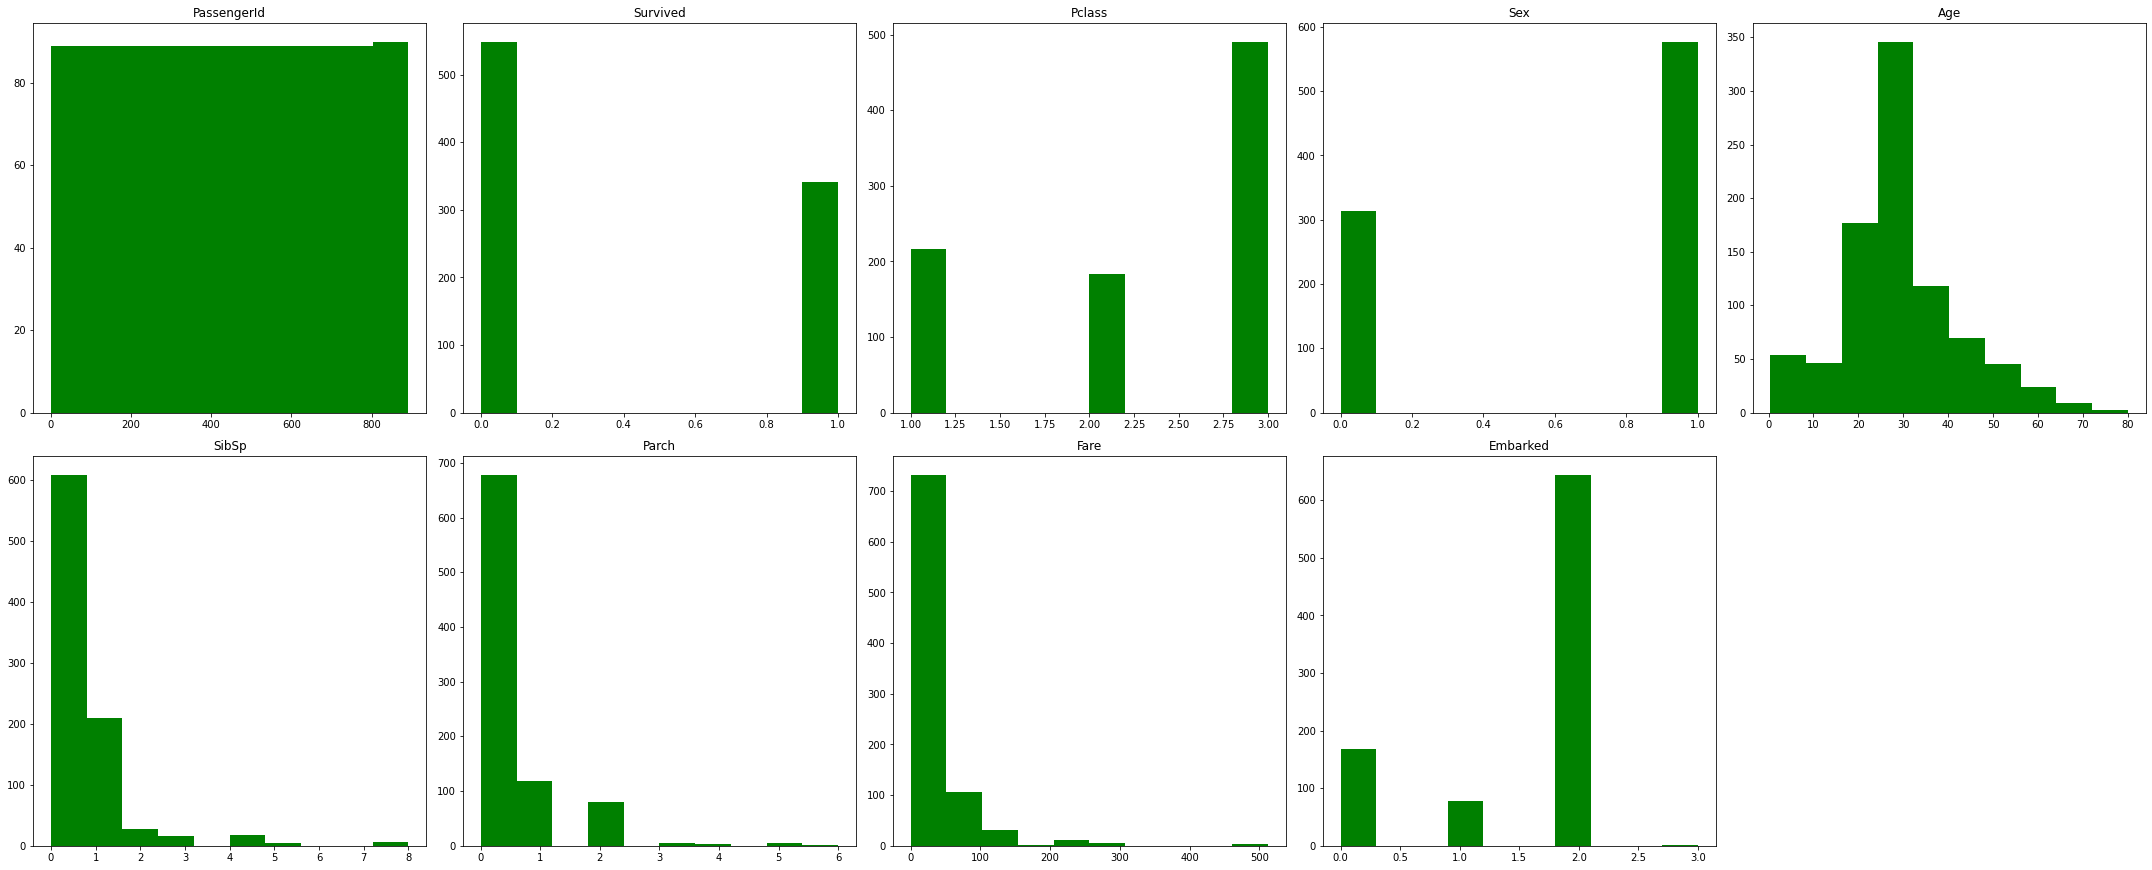

In [40]:
plt.figure(figsize=(30,30))
for i, col in enumerate(titanic.columns.to_list()):
    plt.subplot(5, 5, i + 1)
    plt.hist(titanic[col], label=col,color='green')
    plt.title(col)
    plt.tight_layout()

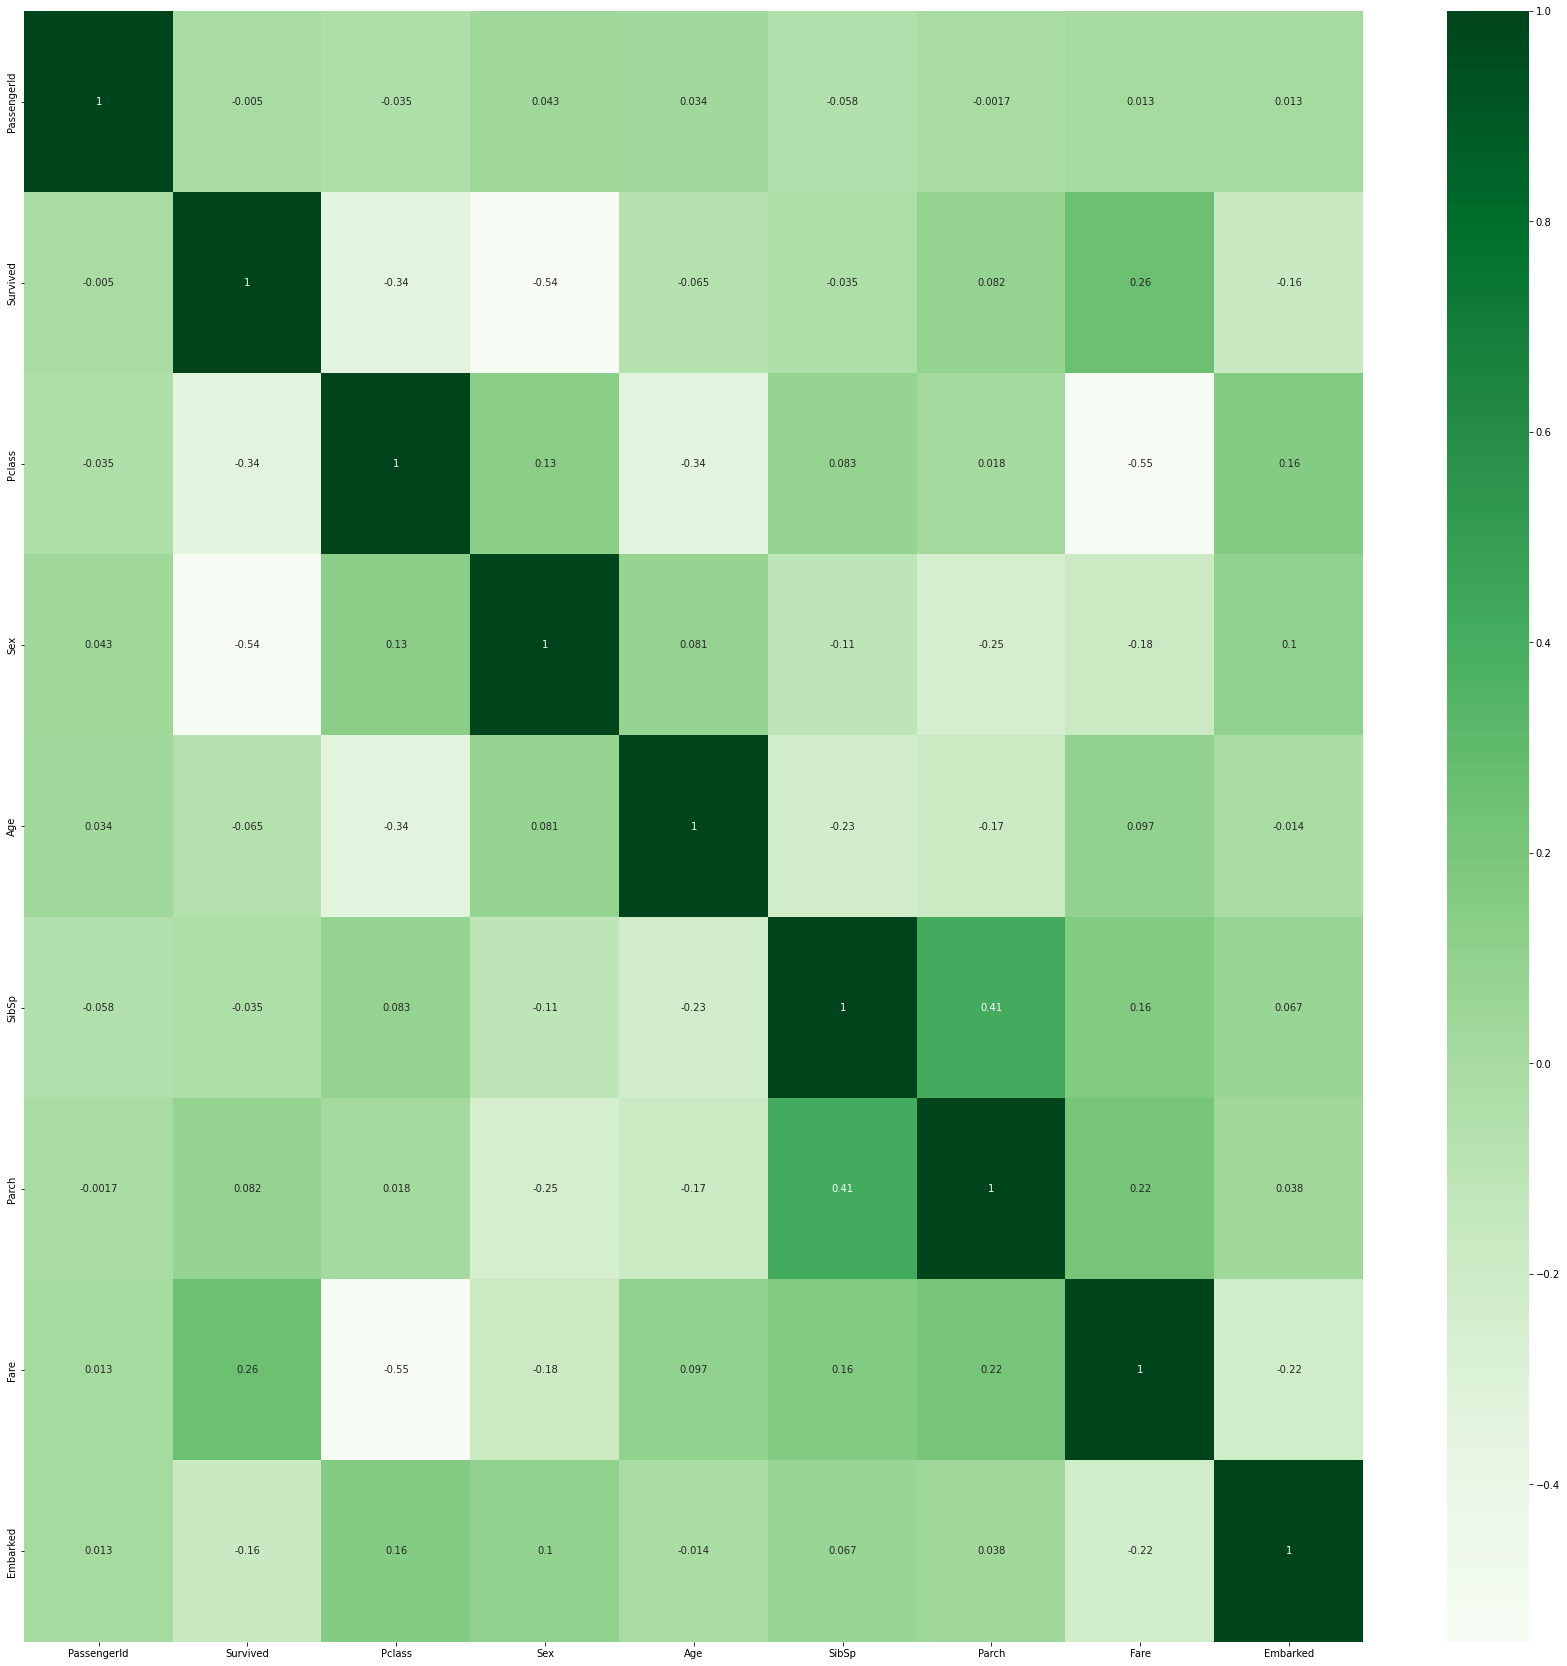

In [42]:
plt.figure(figsize=(30,30))
# heatmap이 feature간에 correlation을 볼떄 좋다.
sns.heatmap(titanic.corr(), annot=True, cmap='Greens')